In [1]:
from qiskit import QuantumCircuit, transpile, Aer
from qiskit.visualization import plot_histogram

import numpy as np

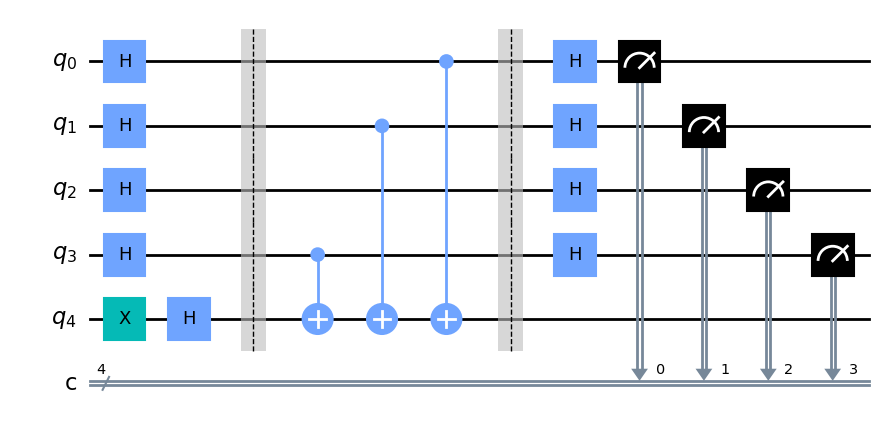

In [2]:
n = 4  # number of qubits used to represent s
s = '1011'   # hidden binary string

bv_circuit = QuantumCircuit(n+1, n) # circuit with n qubits, and one ancilla qubit

# Apply Hadamard gates before querying the oracle
for i in range(n):
    bv_circuit.h(i)
    


# put ancilla in state |->
bv_circuit.x(n)
bv_circuit.h(n)

# Apply barrier 
bv_circuit.barrier()

# Oracle to implement bit string multiplication
# We read "s" in reverse (i.e. backwards) to fit qiskit's qubit ordering (rightmost entry is the least significant qubit q_0)
i = n-1
for q in s:
    if q == '1':
        bv_circuit.cx(i, n)
    i-=1
        
# Apply barrier 
bv_circuit.barrier()

#Apply Hadamard gates after querying the oracle
for i in range(n):
    bv_circuit.h(i)

# Measurement
for i in range(n):
    bv_circuit.measure(i, i)

bv_circuit.draw('mpl')


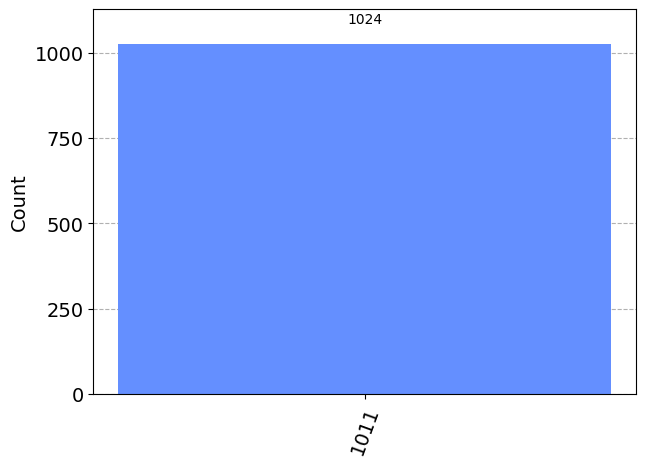

In [3]:
# Let's see the results!
aer_sim = Aer.get_backend('aer_simulator')
shots = 1024
t_bv_circuit = transpile(bv_circuit, aer_sim)
results = aer_sim.run(t_bv_circuit, shots=shots).result()
answer = results.get_counts()

plot_histogram(answer)

In [4]:
# We get the hidden string s=1011 as output

In [5]:
# Let us run this bv_circuit on a real quantum device

In [6]:
from qiskit import IBMQ
from qiskit.providers.ibmq import least_busy

# Load our saved IBMQ accounts and get the least busy backend device with greater than or equal to (n+1) qubits
IBMQ.load_account()
provider = IBMQ.get_provider(hub='ibm-q')
backend = least_busy(provider.backends(filters=lambda x: x.configuration().n_qubits >= (n+1) and
                                   not x.configuration().simulator and x.status().operational==True))
print("least busy backend: ", backend)

/tmp/ipykernel_59/893222118.py:5: DeprecationWarning: The qiskit.IBMQ entrypoint and the qiskit-ibmq-provider package (accessible from 'qiskit.providers.ibmq`) are deprecated and will be removed in a future release. Instead you should use the qiskit-ibm-provider package which is accessible from 'qiskit_ibm_provider'. You can install it with 'pip install qiskit_ibm_provider'. Just replace 'qiskit.IBMQ' with 'qiskit_ibm_provider.IBMProvider'
  IBMQ.load_account()


least busy backend:  ibm_kyoto


In [7]:
# Run our circuit on the least busy backend. Monitor the execution of the job in the queue
from qiskit.tools.monitor import job_monitor

transpiled_circuit = transpile(bv_circuit, backend, optimization_level=3)
job = backend.run(transpiled_circuit)
job_monitor(job, interval=2)

Job Status: job has successfully run


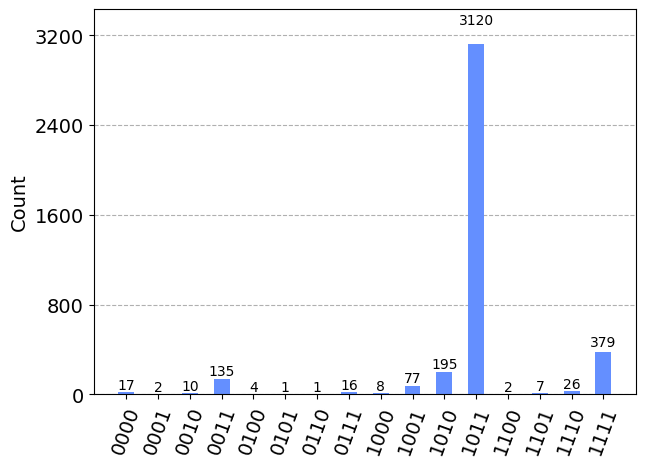

In [8]:
# Get the results of the computation
results = job.result()
answer = results.get_counts()

plot_histogram(answer)

In [9]:
# Output is same as quantum simulator